<a href="https://colab.research.google.com/github/ramkiramanathan/Customer_Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv('/content/cust_data.csv.xlsx.csv')
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [7]:
df.shape

(30000, 38)

In [8]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

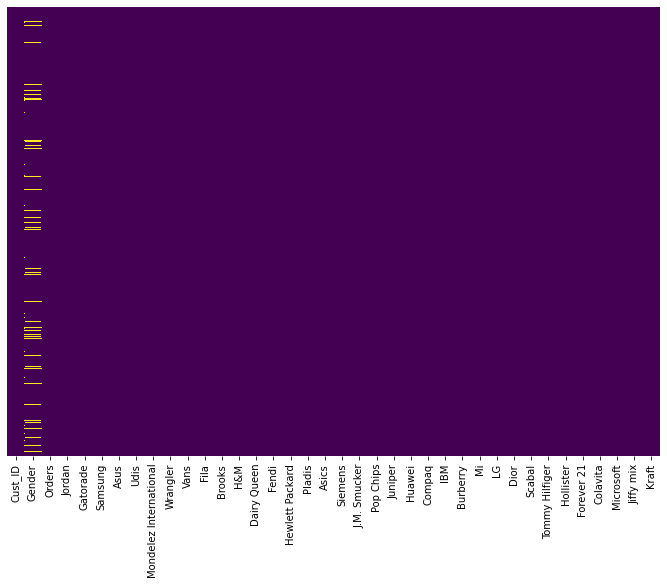

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')


In [10]:
df.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

In [11]:
df.loc[df.Gender.isnull()]

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
13,14,NaN,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
15,16,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,17,NaN,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,42,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29905,29906,NaN,10,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
29928,29929,NaN,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29931,29932,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29970,29971,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df['Gender'].value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

In [13]:
df['Gender'] = df.Gender.map({'F':0,'M':1})

In [14]:
#sns.pairplot(df,hue = 'Gender')
df.corr()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,1.000000,-0.065931,0.029132,0.064277,0.021821,0.057206,0.049191,0.060677,0.035560,0.043043,...,0.029693,0.062489,0.057356,0.016463,0.084793,0.049231,0.002061,-0.005614,-0.019145,0.022508
Gender,-0.065931,1.000000,0.007767,0.023041,0.125629,-0.009161,-0.102281,-0.083667,-0.049625,-0.093346,...,-0.055529,-0.079602,-0.195062,-0.072046,-0.042999,-0.050219,-0.000862,-0.015285,-0.018417,-0.005332
Orders,0.029132,0.007767,1.000000,0.016090,0.034310,0.017885,0.015584,0.009018,0.008741,0.003856,...,-0.006382,0.009027,0.020050,0.003550,0.001680,-0.003436,0.007455,0.015307,0.011268,-0.007160
Jordan,0.064277,0.023041,0.016090,1.000000,0.177254,0.071258,0.123731,0.135673,0.021950,0.040710,...,0.070205,0.061185,0.062582,0.063739,0.026350,0.024710,0.015564,0.015804,0.021651,0.018918
Gatorade,0.021821,0.125629,0.034310,0.177254,1.000000,0.063890,0.046215,0.058180,0.031272,0.088166,...,0.066443,0.056571,0.045958,0.058190,0.050302,0.031495,0.018279,0.016625,0.038655,0.018553
Samsung,0.057206,-0.009161,0.017885,0.071258,0.063890,1.000000,0.012274,0.028785,0.035807,0.014565,...,0.058584,0.017369,0.046561,0.015502,0.021566,0.016170,0.005584,0.003640,0.009303,0.006633
Asus,0.049191,-0.102281,0.015584,0.123731,0.046215,0.012274,1.000000,0.114588,0.018120,0.026668,...,0.025722,0.028911,0.043168,0.039139,0.017283,0.014186,0.009605,0.019748,0.008001,0.007530
Udis,0.060677,-0.083667,0.009018,0.135673,0.058180,0.028785,0.114588,1.000000,0.040251,0.023128,...,0.030406,0.029567,0.068091,0.023367,0.032484,0.035360,0.000437,0.012679,0.004808,0.006795
Mondelez International,0.035560,-0.049625,0.008741,0.021950,0.031272,0.035807,0.018120,0.040251,1.000000,0.021211,...,0.036895,0.034783,0.100657,0.056306,0.036270,0.044912,0.014344,0.013070,0.025066,0.019727
Wrangler,0.043043,-0.093346,0.003856,0.040710,0.088166,0.014565,0.026668,0.023128,0.021211,1.000000,...,0.079583,0.054262,0.099995,0.045565,0.075141,0.066978,0.006188,0.008203,0.015954,0.014749


In [15]:
df.Gender = df.Gender.fillna(df.Gender.mode()[0])

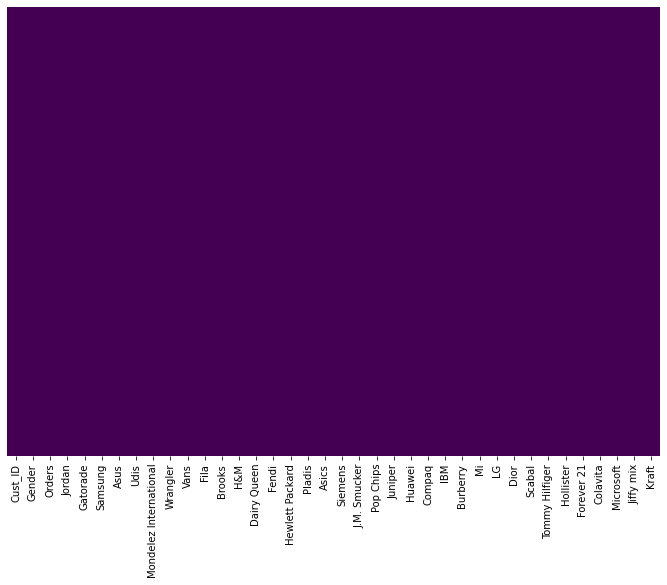

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [17]:
df.isnull().sum().sum()

0

In [18]:
df.drop(columns = ['Cust_ID'],axis =1,inplace = True)

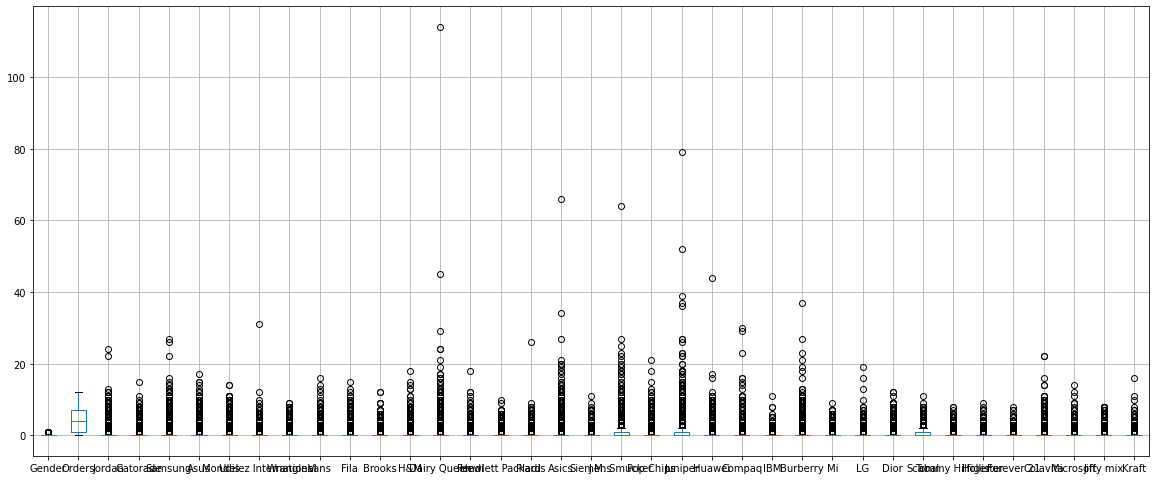

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
df.boxplot()

In [20]:
df.columns

Index(['Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')

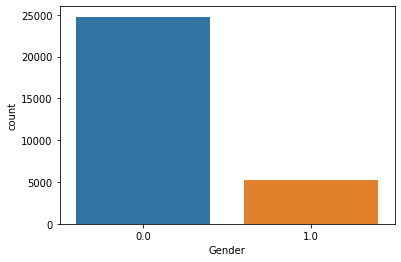

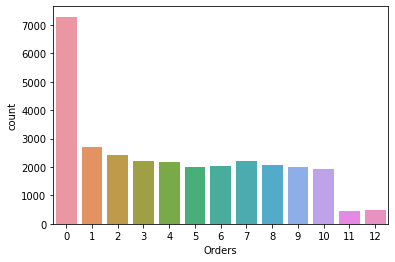

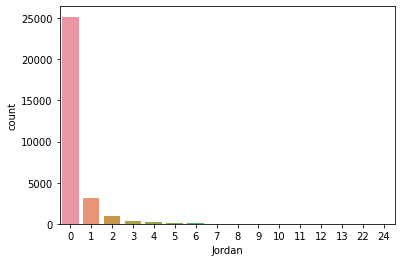

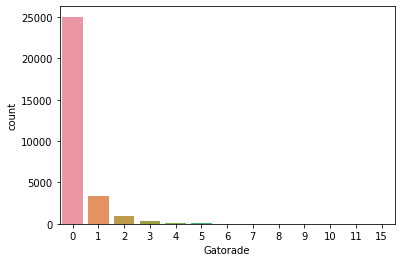

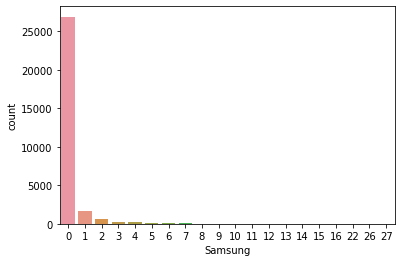

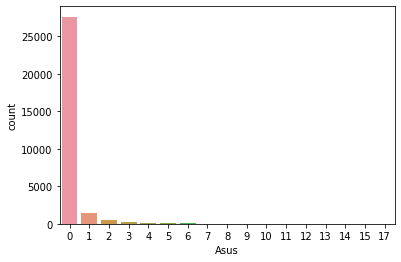

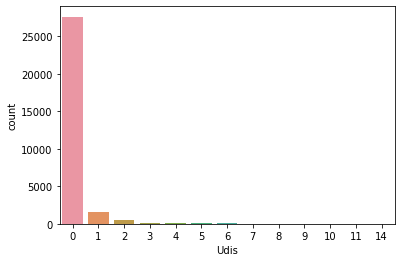

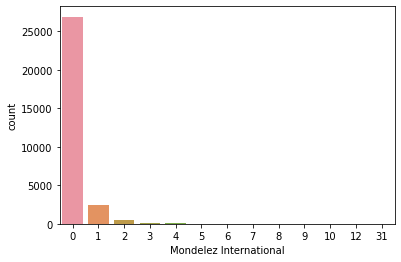

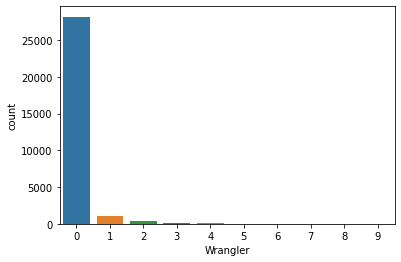

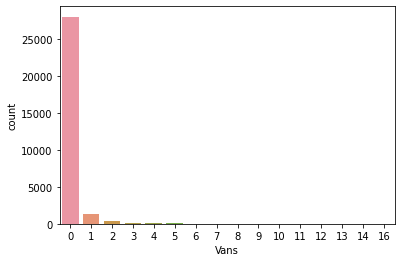

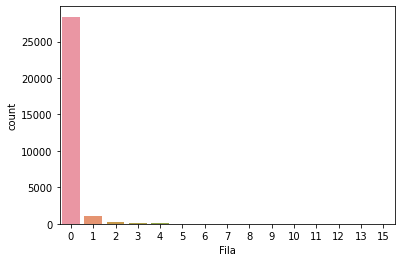

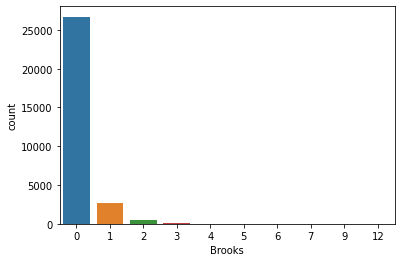

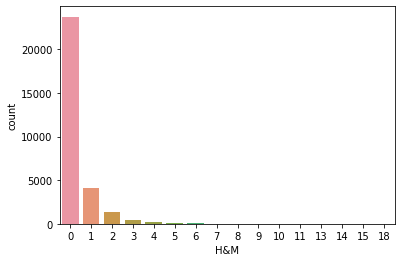

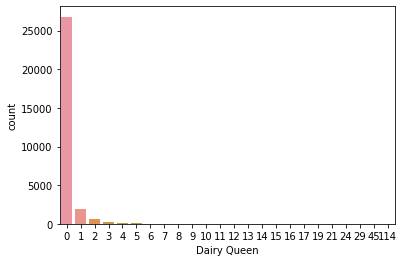

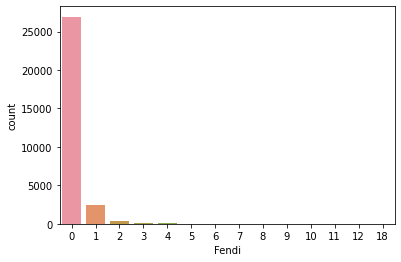

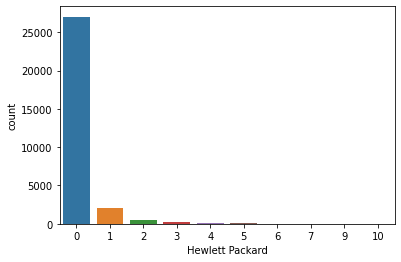

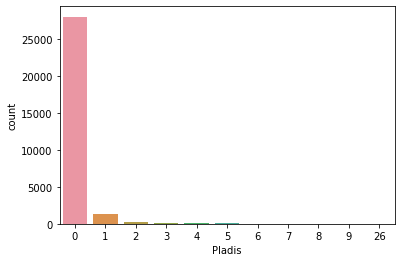

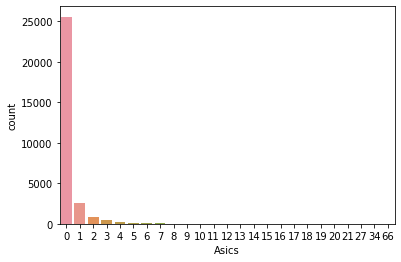

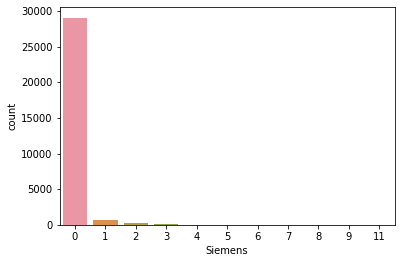

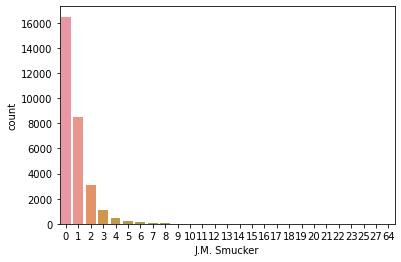

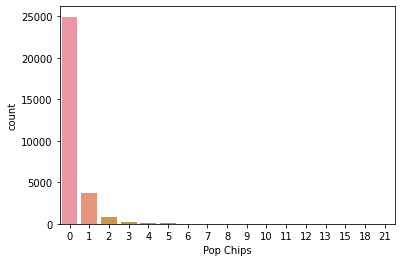

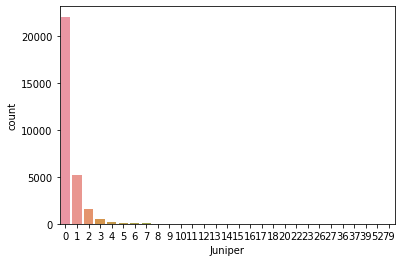

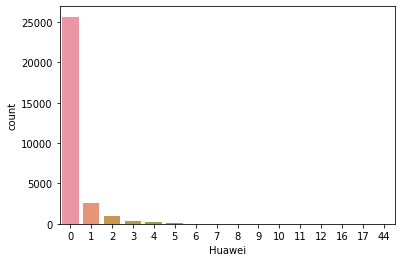

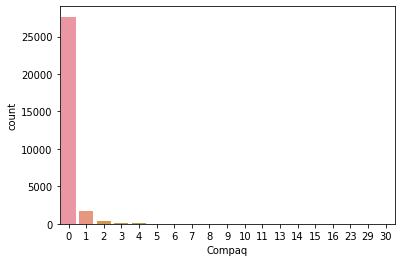

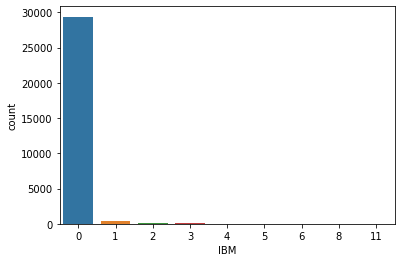

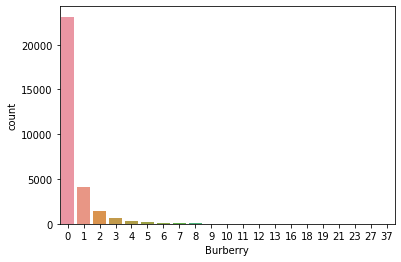

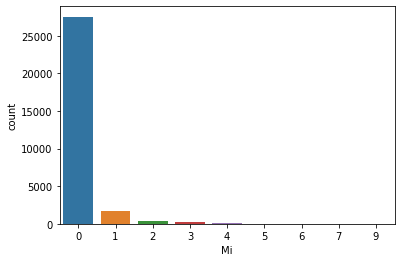

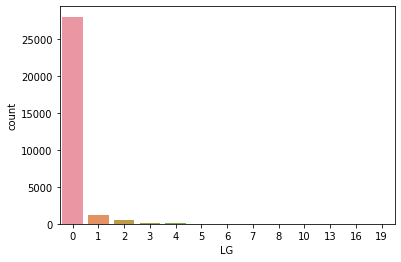

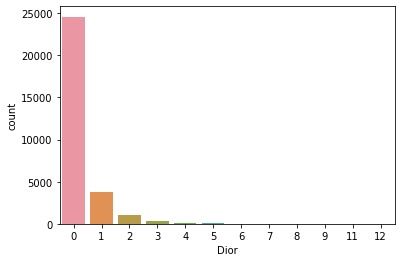

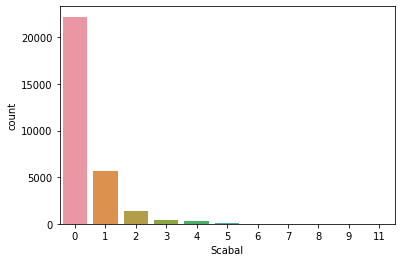

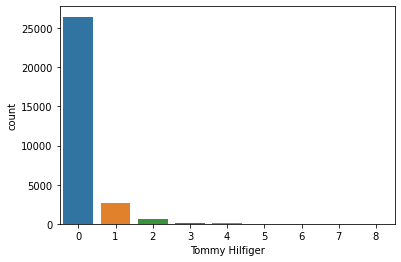

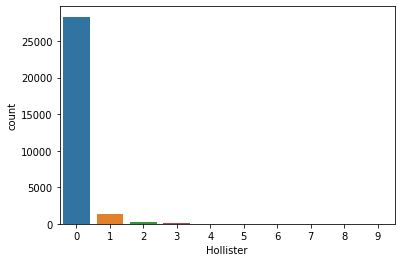

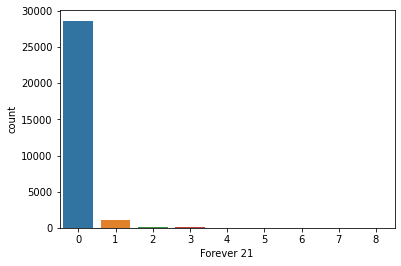

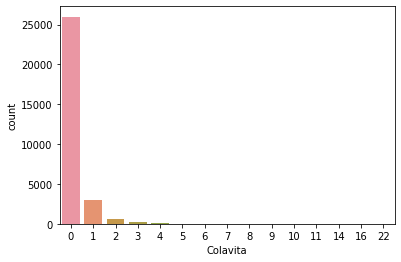

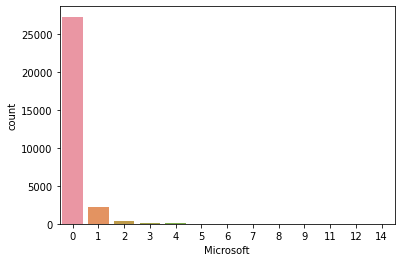

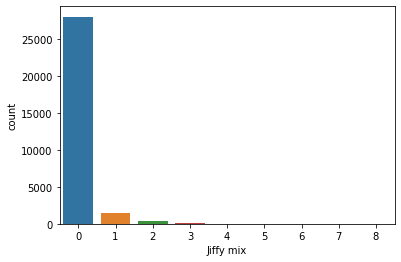

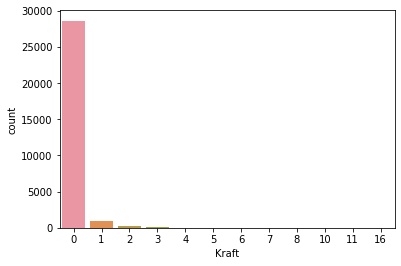

In [21]:

for i in df.columns:
  sns.countplot(x= df[i],data = df)
  plt.show()

## Scaling the Data

In [22]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

In [23]:
df.columns

Index(['Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')

In [24]:
df.drop_duplicates()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1.0,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1.0,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29989,0.0,0,6,0,0,0,1,0,2,0,...,1,0,1,0,0,0,0,0,0,0
29990,1.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29991,0.0,4,3,0,0,0,0,2,0,0,...,0,1,1,0,0,0,1,1,0,0
29994,1.0,2,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
df.shape

(30000, 37)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(25)
pca.fit(df_scaled)
pca_df = pca.transform(df_scaled)
np.sum(pca.explained_variance_ratio_)
#dir(pca)


0.7703372955115991

## Finding the best Value of K for KMeans

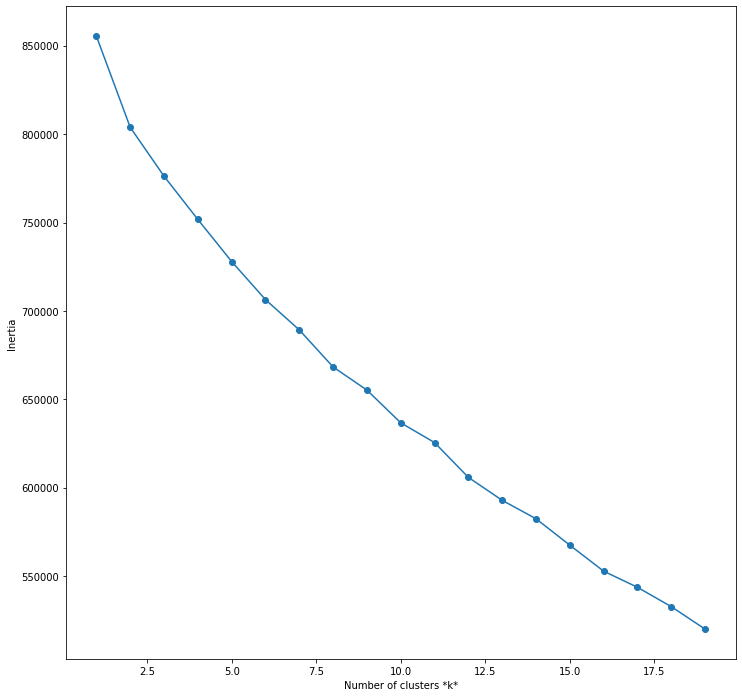

In [27]:
# Elbow plot
# We make a plot between k value and inertia
inertias = []  # storer inertia for all values of k 
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(pca_df)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(12, 12))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia'); 

In [29]:
from sklearn.metrics import silhouette_score
for n in range(2,5):  
  km = KMeans(n_clusters=n)
  km.fit(pca_df)
  labels = km.labels_
  ss = silhouette_score(df_scaled,labels)
  print("No of Clusters {} and silhouette_score is {}".format(n,ss))

No of Clusters 2 and silhouette_score is 0.3998478166842088
No of Clusters 3 and silhouette_score is 0.24824246502868438
No of Clusters 4 and silhouette_score is 0.23891478825531318


## The customers can be segmented into 2 groups